# **Page Rank:**

Developed by Google founders to measure the importance of webpages from the hyperlink network structure. pagerank assigns a score of importance for each node. The Impoertant nodes are those with many inlinks from important pages. Page rank can be used for any type of network, but its mainly useful for Directed networks.

A node's page rank edepends upon the page rank of the other nodes.This is a kind of circular definition. 

In simple words, PageRank says that nodes who are central are the ones that, if you were to take a random walk on this network, then you would pass by them a lot of times or you would end up landing on them a lot of times.



In [0]:
import networkx as nx
import matplotlib.pylab as plt
import operator
G1 = nx.read_adjlist('medium_sized_facebook_combined.txt',create_using=nx.Graph(),nodetype=int)

The Basic PageRank of a node can be interpreted as the probability that a random walk lands on the node after k Random steps.The problem with the basic page rank algorithm is that in some networks few nodes can "suck up" all the page rank from the Network.

To fix this problem, Scaled PageRank introduces a parameter Alpha such that a random walker chooses a random node to jump to with probability 1 - Alpha.Typically alpha value varies between 0.8 and 0.9.

In [0]:
def pr_calculation():
  pr = nx.pagerank(G1,alpha=0.85)
  return pr

# **Hits Algorithm**

* The HITS algorithm starts by constructing a root set of relevant web pages and expanding it to a base set.
* HITS then assigns an authority and hub score to each node in the network. 
* Nodes that have incoming edges from **good hubs** are **good authorities**, and nodes that have outgoing edges to **good authorities** are **good hubs**. 
* Authority and hub scores converge for most networks.

Important point to be noted here is, in order to understand what the HITS algorithm is saying, the Hub and authorities scores need to be looked together together.

In [0]:
def hits_calculation():
  # max_iteration is set to 200 as default value of 100 was not sufficient for hits  vaules to converge
  hits = nx.hits(G1,max_iter=200)
  return hits

# **Plots**

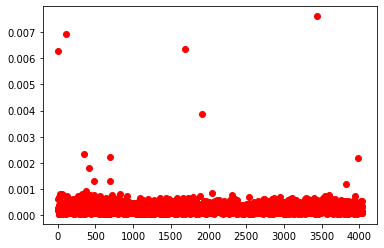

In [0]:
import operator
pr = pr_calculation()
lists = sorted(pr.items())
x, y = zip(*lists)
plt.plot(x, y,'ro')
plt.show()

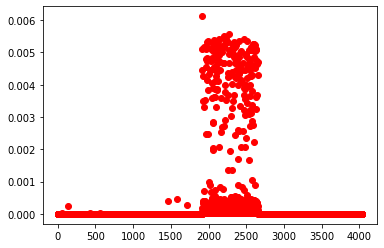

In [0]:
hubs,auths = hits_calculation()
lists = sorted(hubs.items())
x, y = zip(*lists)
plt.plot(x, y,'ro')
plt.show()

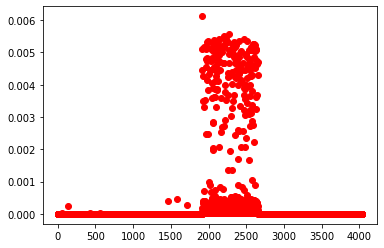

In [0]:
lists = sorted(auths.items())
x, y = zip(*lists)
plt.plot(x, y,'ro')
plt.show()

# **Summary**![alt text](https://drive.google.com/uc?id=1S87Zl6WkjQfnISiCOj0IPiO57T6_EhFE)


* It can be observed that no pair of centrality measures produces the exact same ranking of nodes, however theyshare some commonalities.

* Centrality measures make different assumptions about
what it means to be a "central” node. Thus, they produce different rankings.

* The best centrality measure depends on the context of the network one is analyzing.

* When identifying central nodes, it is usually best to use multiple centrality measures instead of relying on a single one.

In [0]:
top5 = sorted(pr.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print(top5)

In [0]:
top5 = sorted(auths.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print(top5)

In [0]:
top5 = sorted(hubs.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print(top5)